In [44]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import csv
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.gridspec as gridspec


from BSE import market_session

In [45]:
start_time = 0
end_time = 60 * 10
order_interval = 5
chart1_range=(80, 320)


In [46]:
sellers_spec = [('ZIC', 10)]

buyers_spec = [('ZIP',10)]

traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}

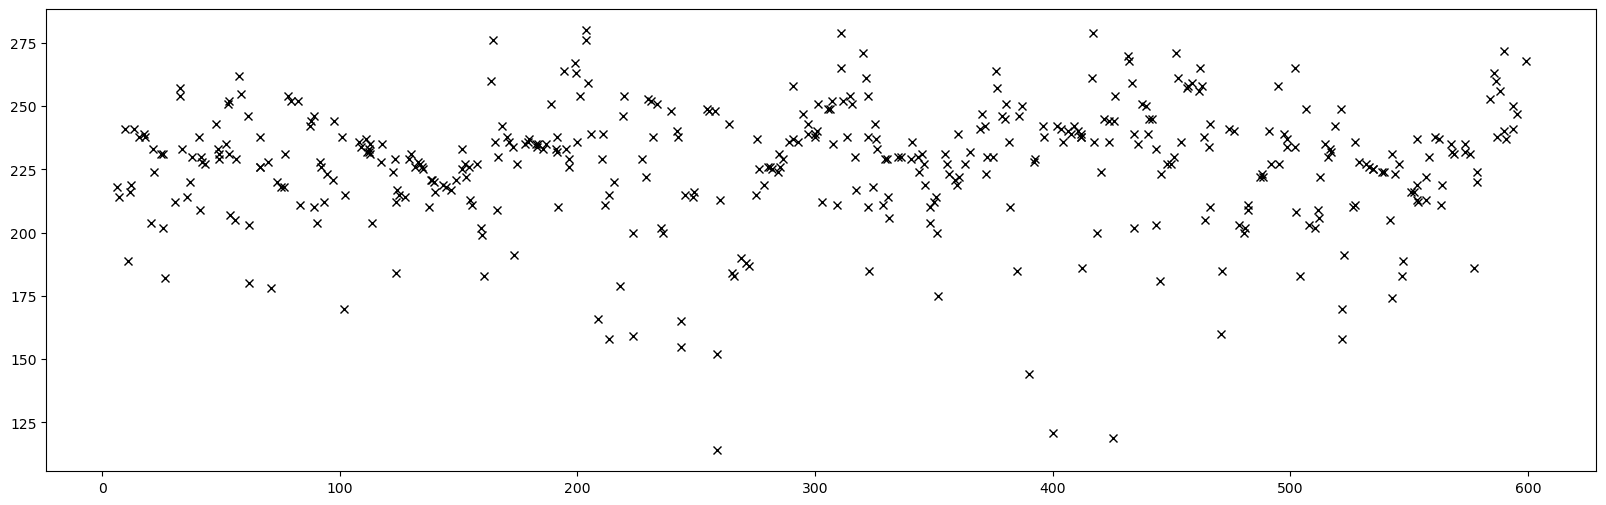

In [55]:
supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [chart1_range], 'stepmode': 'fixed'}]
demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [chart1_range], 'stepmode': 'fixed'}]

order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
               'interval': order_interval, 'timemode': 'periodic'}


verbose = False

dump_flags = {'dump_blotters': True, 'dump_lobs': True, 'dump_strats': True,
              'dump_avgbals': True, 'dump_tape': True}


n_sessions = 1

x = np.empty(0)
y = np.empty(0)

for sess in range(n_sessions):
    trial_id = 'new_trader_chart_' + str(sess)

    market_session(trial_id, start_time, end_time, traders_spec, order_sched, dump_flags, verbose)

    prices_fname = trial_id + '_tape.csv'
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[1])
            price = float(row[2])
            x = np.append(x,time)
            y = np.append(y,price)
plt.figure(figsize=(20, 6))
plt.plot(x, y, 'x', color='black');